## Описание проекта

# Задача
Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Основная задача — провести анализ и подготовить план действий по удержанию клиентов.

А именно:
- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
1. выделить целевые группы клиентов;
2. предложить меры по снижению оттока;
3. определить другие особенности взаимодействия с клиентами.


# Описание данных
Набор данных включает следующие поля:

1. Данные клиента за предыдущий до проверки факта оттока месяц:
- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент - в таком случае фитнес-центр хранит информацию о работодателе клиента);
- 'Promo_friends' — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

2. Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
- 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
- 'Churn' — факт оттока в текущем месяце.


## Шаг 1. Загрузка и предобработка данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
import warnings
warnings.filterwarnings("ignore")

In [2]:
gym_churn = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
gym_churn.info()
gym_churn

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


Исходя из первичного анализа, можно сделать вывод, что тип данных во всех столбцах верный, пропущенных значений нет. Также стоит проверить на дубликаты. Также названия столбцов необходимо привести к единому регистру.

In [4]:
gym_churn[gym_churn.duplicated()]

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn


Дубликаты также отсутствуют.

In [5]:
gym_churn.columns = gym_churn.columns.str.lower()
gym_churn.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

Привела все столбцы к единому регистру для более удобной работы с данными.

# В рамках данного шага были проделаны следующие действия:
- Загружены данные из исходных таблиц.
- Данные проверены на наличие пустых значений и дубликатов - пустые значения и дубликаты отсутствуют.
- Названия колонок всех таблиц приведены к "змеиному" регистру.

## Шаг 2. Исследовательский анализ данных (EDA)

- Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe());
- Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());
- Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);
- Постройте матрицу корреляций и отобразите её.

### Оценка количества и качества данных в датасете

Оценим количество данных в таблице, а также наличие статистических выбросов и их количество.

In [6]:
gym_churn.shape

(4000, 14)

In [7]:
gym_churn.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


В предложенном датасете представлено 4000 строк и 14 полей. Все поля имеют целочисленные или вещественные значения. Категориальные поля отсутствуют, поэтому дополнительная обработка датасета не нужна.
Отсутствующих данных в датасете нет.
Аномалии данных на первый взгляд отсутствуют - нет данных противоречащих логике (например в полях age или lifetime) или явных выбросов. Но последнее стоит рассмотреть отдельно по признакам - рассмотрим лишь небинарные признаки: contract_period, age, avg_additional_charges_total, month_to_end_contract, lifetime, avg_class_frequency_total, avg_class_frequency_current_month.

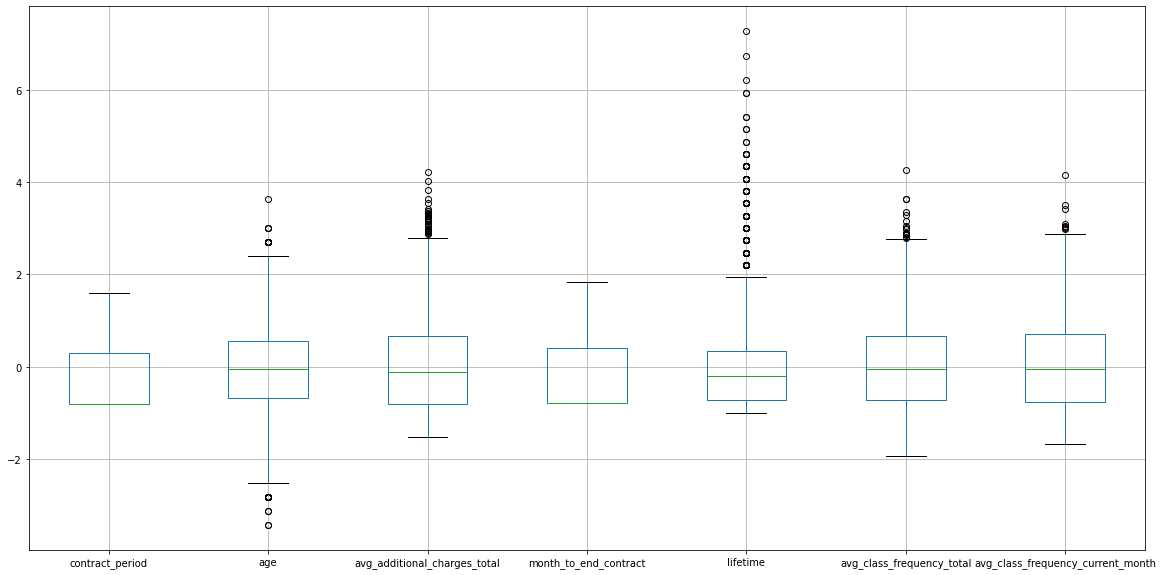

In [8]:
scaler = StandardScaler() # создаём объект класса scaler (нормализатор)
gym_churn_sc = pd.DataFrame(scaler.fit_transform(gym_churn[['contract_period', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']]), 
                                                 columns = ['contract_period', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']) # обучаем нормализатор и преобразуем набор данных 

fig, ax = plt.subplots()

#нарисуем тепловую карту с подписями для матрицы корреляций
gym_churn_sc.boxplot()
fig.set_size_inches(20, 10)
plt.show()

Судя по графику в указанных полях присутствуют выбросы, которые могут создавать дополнительный шум при обучении наших моделей прогнозирования. Оценим какую долю данных составляют эти выбросы.

In [9]:
def set_outlier_flag(df, column):
    def is_outlier(val, low, up):
        if (val >= low) & (val <= up):
            return 0
        else:
            return 1
        
    mean = df[column].mean()
    std = df[column].std()
    lower_border = mean - 3*std
    upper_border = mean + 3*std
    df['flag'] = df['flag'] + pd.Series([is_outlier(x, lower_border, upper_border) for x in df[column]])

In [10]:
columns = ['contract_period', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']
gym_churn['flag'] = 0
for col in columns:
    set_outlier_flag(gym_churn, col)

print('Доля выбросов: {:.2f}%'.format(len(gym_churn[gym_churn['flag'] > 0]) / len(gym_churn) * 100))

Доля выбросов: 3.10%


Доля выбросов составляет всего 3.1%. Считаю, что можно исключить их без потери качества данных.

In [11]:
gym_churn = gym_churn[gym_churn['flag'] == 0].reset_index(drop = True)

### Оценка распределения признаков относительно значений целевой переменной

Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [12]:
gym_churn.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,flag
churn,,,,,,,,,,,,,,
0,0.509226,0.872960,0.540099,0.357346,0.903833,5.769695,0.460965,29.981547,156.122724,5.306246,4.310149,2.020821,2.023148,0.0
1,0.512287,0.768431,0.355388,0.184310,0.902647,1.730624,0.268431,27.014178,115.160627,1.664461,0.991493,1.475580,1.046231,0.0


На основе этих значений можно заметить значительную разницу в следующих признаках:
- <i>partner</i> - сотрудник компании-партнёра клуба реже попадают в отток;
- <i>promo_friends</i> - клиенты, пришедшие в рамках программы "приведи-друга" реже попадают в отток;
- <i>contract_period</i> - клиенты реже попадают в отток, если они заключают длительные контракты;
- <i>group_visits</i> - клиенты, ходящие на групповые занятия, реже попадают в отток;
- <i>month_to_end_contract</i> - клиенты чаще попадают в отток, если до окончания контракта осталось мало времени;
- <i>lifetime</i> - клиенты с более долгой историей посещения реже попадают в отток;
- <i>avg_class_frequency_total</i> - клиенты ходящие от 2 раз в неделю реже попадают в отток;
- <i>avg_class_frequency_current_month</i> - клиенты ходящие от 2 раз в неделю за последний меясц реже попадают в отток

Оценим распределения признаков между клиентами попавшими в отток, и оставшимися среди клиентов.

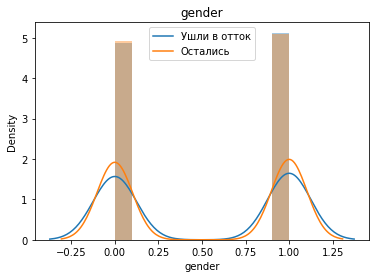

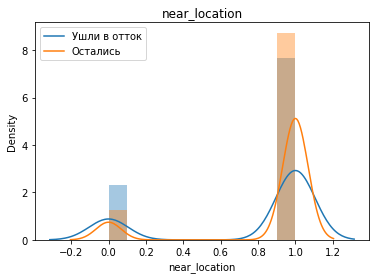

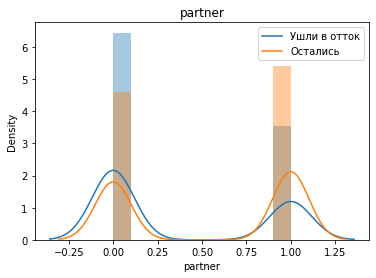

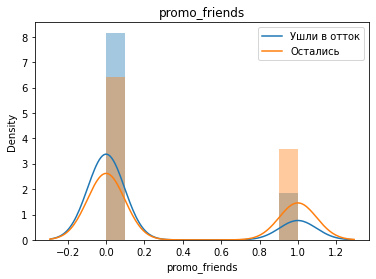

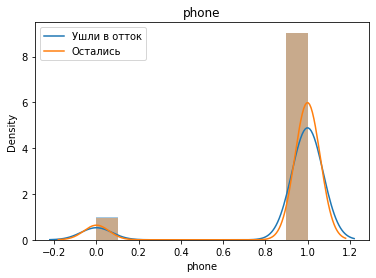

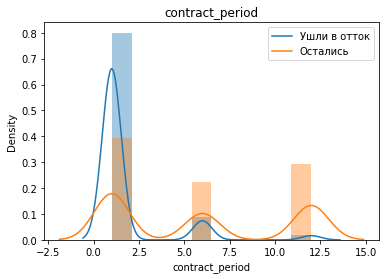

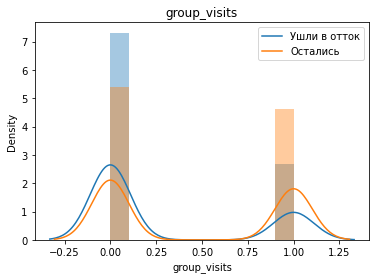

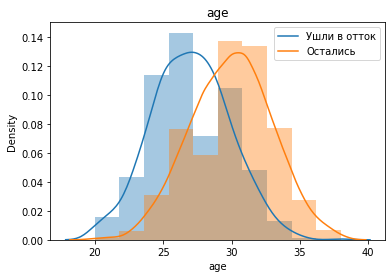

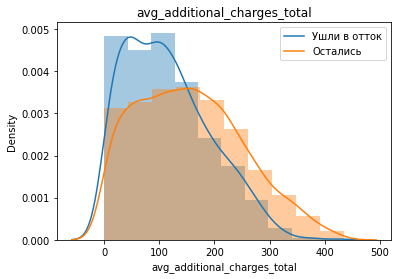

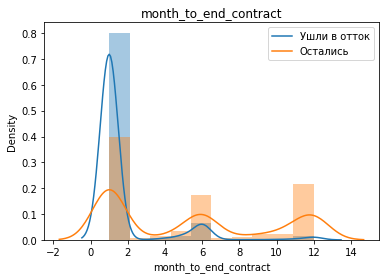

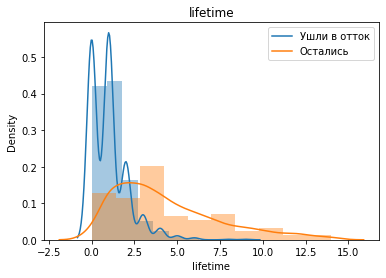

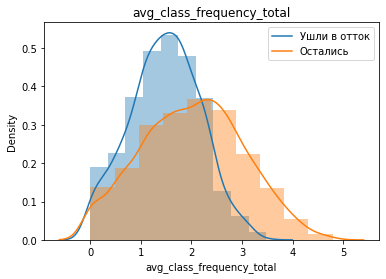

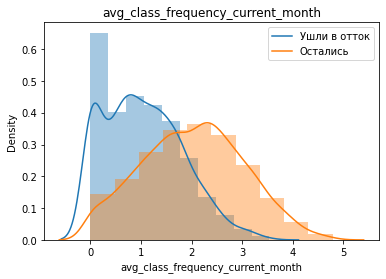

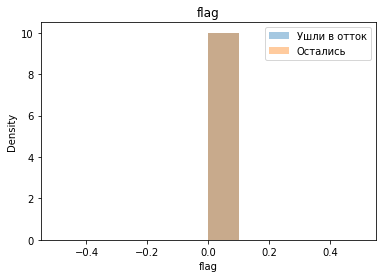

In [13]:
for column in gym_churn.columns.drop('churn'):
    sns.distplot(gym_churn.loc[gym_churn['churn'] == 1, column], bins=10)
    sns.distplot(gym_churn.loc[gym_churn['churn'] == 0, column], bins=10)
    plt.title(column)
    plt.legend(['Ушли в отток', 'Остались'])
    plt.show() 

Графики подтверждают сделанные выводы. Также стоит отметить такие признаки:
- <i>age</i> - клиенты ушедшие в отток в целом моложе, чем клиенты, продолжащие посещать зал. 
- <i>Avg_additional_charges_total</i> - клиенты, продолжающие посещать зал, как правило чащу используют другие услуги фитнес-центра

### Построение матрицы корреляции

Построим матрицу корреляции и отобразим ее.

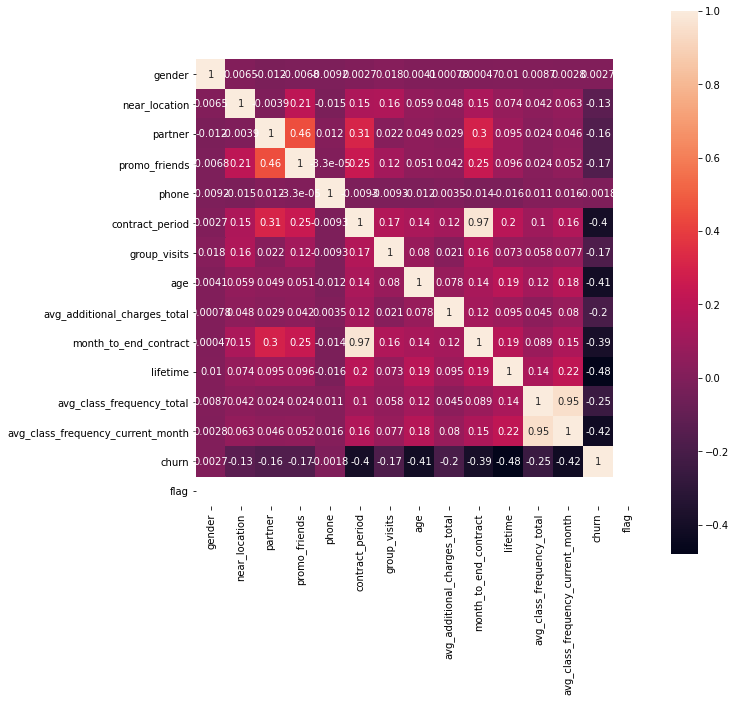

In [14]:
#построим и отрисуем матрицу корреляций
cm = gym_churn.corr() #вычисляем матрицу корреляций
fig, ax = plt.subplots()

#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm, annot=True, square=True)
fig.set_size_inches(10, 10)
plt.show()

Матрица корреляции подтверждает наши выводы. Показатели <i>partner</i>, <i>promo_friends</i>, <i>contract_period</i>, <i>group_visits</i>, <i>month_to_end_contract</i>, <i>lifetime</i>, <i>avg_class_frequency_total</i>, <i>avg_class_frequency_current_month</i>, <i>age</i>, <i>avg_additional_charges_total</i> имеют высокий уровень корреляции (отрицательной) с целевой переменной <i>churn</i>

# В рамках данного шага были проделаны следующие действия:
- Данные были проверены на наличие статистических выбросов. Доля выбросов составляет всего 3.1%. Считаю, что можно исключить их без потери качества данных.
- Распределение ряда признаков значительно отличаются для групп Ушедших в отток и Оставшихся. В перспективе именно эти признаки должны иметь наибольшее влияние на результаты прогноза:
    - <i>partner</i>
    - <i>promo_friends</i>
    - <i>contract_period</i>
    - <i>group_visits</i>
    - <i>month_to_end_contract</i>
    - <i>lifetime</i>
    - <i>avg_class_frequency_total</i>
    - <i>avg_class_frequency_current_month</i>
    - <i>age</i>
    - <i>avg_additional_charges_total</i>
- Матрица кореляции демонстрирует подтверждение важности наших выбранных признаков (корреляции примерно -0,4 с целевой переменной <i>churn</i>.

## Шаг 3. Построение модели прогнозирования оттока клиентов
Построим модели бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:
- Разобьем данные на обучающую и валидационную выборку функцией train_test_split().
- Обучим модель на train-выборке двумя способами:
    - логистической регрессией,
    - случайным лесом.
- Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравним по ним модели.

In [15]:
# разделяем данные на признаки (матрица X) и целевую переменную (y)
X = gym_churn.drop('churn', axis = 1)
y = gym_churn['churn']

# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
# определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [17]:
# задайте алгоритм для нашей модели
model = LogisticRegression(solver='liblinear', random_state=0)

# обучите модель
model.fit(X_train, y_train)

# воспользуйтесь уже обученной моделью, чтобы сделать прогнозы
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)[:, 1]
print_all_metrics(y_test, predictions, probabilities, 'Логистическая регрессия')

Логистическая регрессия
	Accuracy: 0.94
	Precision: 0.92
	Recall: 0.83


In [18]:
# задайте алгоритм для нашей модели
model = RandomForestClassifier(n_estimators = 100, random_state=0)

# обучите модель
model.fit(X_train, y_train)

# воспользуйтесь уже обученной моделью, чтобы сделать прогнозы
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)[:, 1]
print_all_metrics(y_test, predictions, probabilities, 'Случайный лес')

Случайный лес
	Accuracy: 0.92
	Precision: 0.88
	Recall: 0.81


Каждый из показателей модели Логистической регрессии выше, чем соответствующий показатель Случайного леса. На основании этого можно сделать вывод о том, что модель Логистической регресси лучше, чем модель Случайного леса.

# В рамках данного шага были проделаны следующие действия:
- Разделила выборку на обучающую и валидационную выборки используя метод <i>train_test_split</i> (используется именно он, так как отсутствуют временные ряды.
- Обучила модели Логистической регрессии и Случайного леса на обучающих выборках.
- Посчитала значение прогноза на валидационной выборке.
- Посчитала метрики доля правильных ответов (Accuracy), точности (Precision) и полноты (Recall).
- Сравнила значение этих метрик и пришла к выводу, что модель Логистической регрессии показывает лучшие результаты.

## Шаг 4. Кластеризация клиентов

### Стандартизируем данные.

In [19]:
scaler = StandardScaler() # создаём объект класса scaler (нормализатор)
X_sc = scaler.fit_transform(X) # обучаем нормализатор и преобразуем набор данных 

Стандартизировала данные выборки.

### Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму.

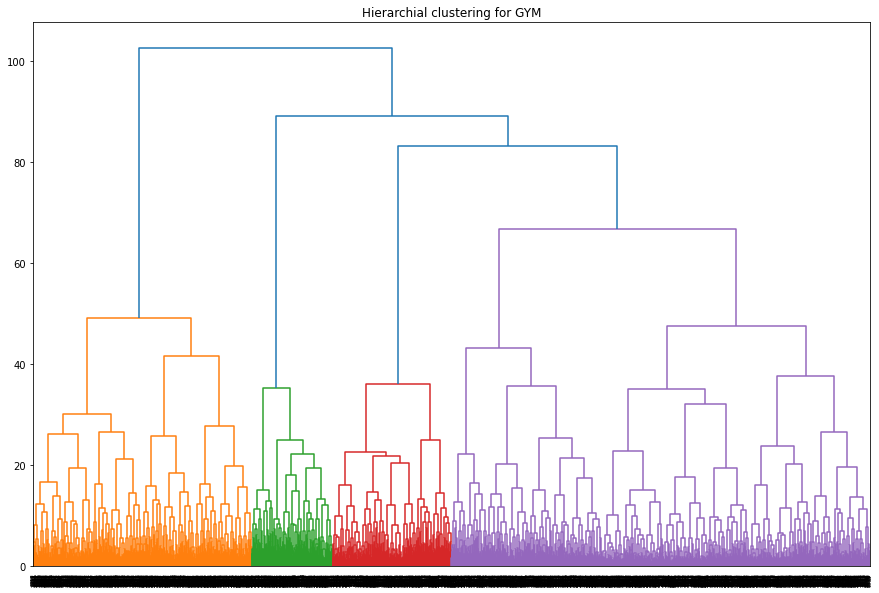

In [20]:
linked = linkage(X_sc, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show() 

Судя по дендрограмме можно выделить 5 основных кластеров (если провести линию на уровне 60).

### Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов

In [21]:
# задаём модель k_means с числом кластеров 3 и фиксируем значение random_state
km = KMeans(n_clusters=5, random_state=0)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 2)
labels = km.fit_predict(X_sc)

gym_churn['cluster'] = labels

Обучила модель кластеризации, расчитала значения кластеров и записала их в поле исходной выборки. 

### Проанализируем средние значения и распределения признаков для кластеров.

In [22]:
gym_churn.groupby('cluster').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,flag
cluster,,,,,,,,,,,,,,,
0,0.524064,0.860963,0.470588,0.310160,0.0,4.796791,0.422460,29.294118,143.949228,4.486631,3.556150,1.839589,1.704752,0.275401,0.0
1,0.487222,0.722176,0.300082,0.013190,1.0,1.896125,0.278648,28.111294,128.539710,1.804617,1.976092,1.251852,0.990548,0.583677,0.0
2,0.503563,0.938242,0.742280,0.489311,1.0,11.836105,0.546318,29.921615,161.817143,10.787411,4.381235,2.009413,2.000788,0.022565,0.0
3,0.552663,0.844970,0.281657,0.066272,1.0,2.629586,0.434320,30.000000,155.539777,2.439053,4.497041,2.754847,2.747924,0.079290,0.0
4,0.496678,0.948505,0.822259,1.000000,1.0,3.003322,0.431894,29.019934,140.127833,2.828904,3.287375,1.710237,1.598625,0.267442,0.0


Кластера можно характеризовать следующим образом в зависимости от среднего признакам:
- 0 класс - клиенты у которых отсутствует в базе телефон, однако которые ходят около 2 раз в неделю и ходят в фитнес-центр около 4 месяцев <b>"любители"</b>
- 1 класс - клиенты, как правило, приходящие в фитнес-центр сами, даже не являясь сотрудниками компаний-партнёров, редко ходящие на групповые занятия, заключающие самые короткие контракты и ходящие в спорт-зал реже всего среди всех классов - <b>"случайные"</b>.
- 2 класс - клиенты - сотрудники компаний-партнеров, заключающие длительные контракты - <b>"партнеры"</b>.
- 3 класс - клиенты, как правило, приходящие в фитнес-центр сами, даже не являясь сотрудниками компаний-партнёров, однако ходящих в зал чаще других классов - <b>"спортсмены"</b>.
- 4 класс - клиенты, приходящие по программе "приведи-друга" и сотрудники компаний-партнеров, заключающие контракты около 3 месяцев - <b>"гости"</b>

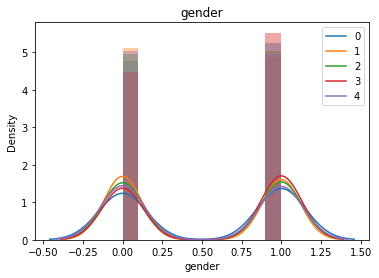

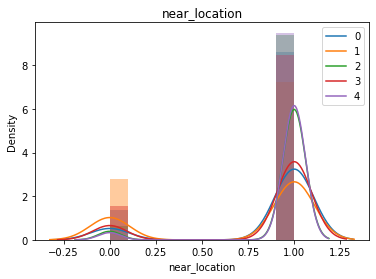

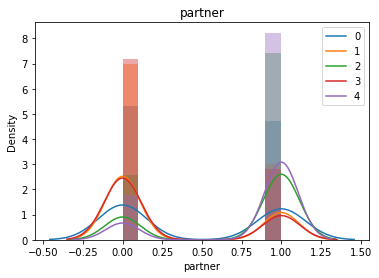

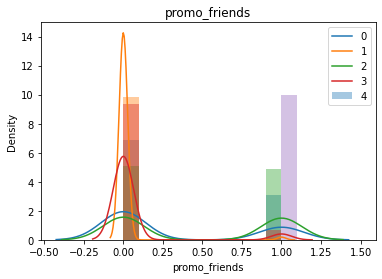

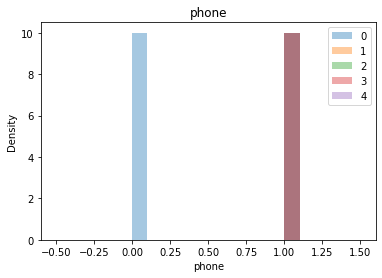

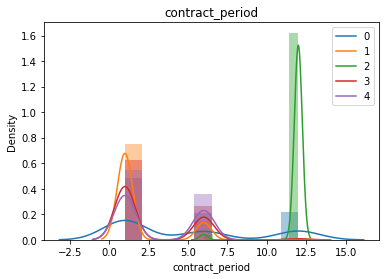

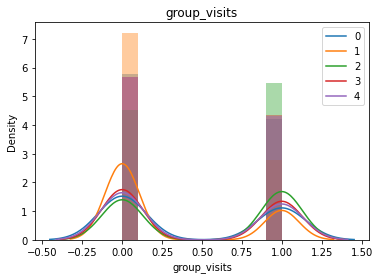

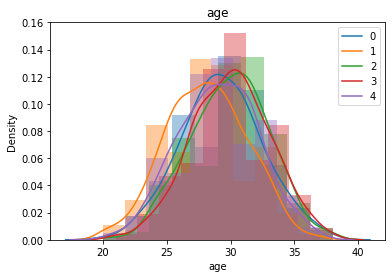

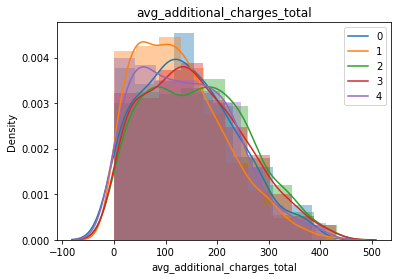

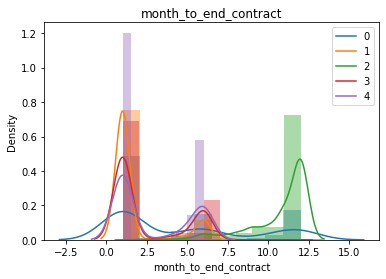

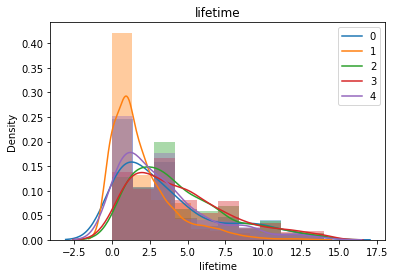

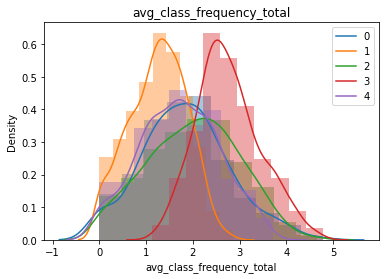

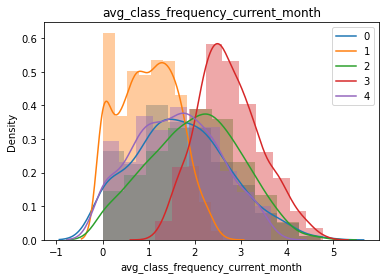

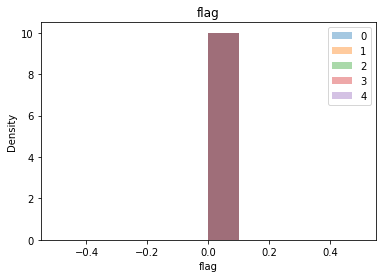

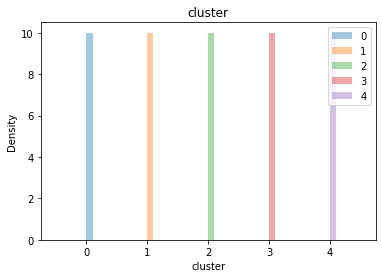

In [23]:
for column in gym_churn.columns.drop('churn'):
    sns.distplot(gym_churn.loc[gym_churn['cluster'] == 0, column], bins=10)
    sns.distplot(gym_churn.loc[gym_churn['cluster'] == 1, column], bins=10)
    sns.distplot(gym_churn.loc[gym_churn['cluster'] == 2, column], bins=10)
    sns.distplot(gym_churn.loc[gym_churn['cluster'] == 3, column], bins=10)
    sns.distplot(gym_churn.loc[gym_churn['cluster'] == 4, column], bins=10)
    plt.title(column)
    plt.legend(['0', '1', '2', '3', '4'])
    plt.show() 

Графики распределения подтверждают выводы, сделанные на предыдущем шаге.

In [24]:
gym_churn.groupby('cluster')['churn'].count()

cluster
0     374
1    1213
2     842
3     845
4     602
Name: churn, dtype: int64

In [25]:
gym_churn.groupby('cluster')['churn'].mean()

cluster
0    0.275401
1    0.583677
2    0.022565
3    0.079290
4    0.267442
Name: churn, dtype: float64

Чаще всего попадают в отток клиенты из 1 класса - "случайные", реже всего клиенты 2 и 3 классов - "партнеры" и "спортсмены". 

# В рамках данного шага были проделаны следующие действия:
- Стандартизировала данные
- Построила дендрограмму по диаграмме расстояний
- Обучила модель кластеризации на 5 кластерах и рассчитала кластера клиентов
- Проанализировала кластера, определив ключевые признаки выделенных кластеров
- Проанализировала рассчитанные кластера на среднее значение оттока - чаще всего попадают в отток клиенты из 1 класса - <b>"случайные"</b>, реже всего клиенты 2 и 3 классов - <b>"партнеры"</b> и <b>"спортсмены"</b>.

## Шаг 5. Выводы и базовые рекомендации по работе с клиентами

На этапе считывания данных выполнила следующие действия:
- Загружены данные из исходных таблиц.
- Данные проверены на наличие пустых значений и дубликатов - пустые значения и дубликаты отсутствуют.
- Названия колонок всех таблиц приведены к "змеиному" регистру.

Провела исследовательский анализ данных и получила следующие результаты:
- Данные были проверены на наличие статистических выбросов. Доля выбросов составляет всего 3.1%. Считаю, что можно исключить их без потери качества данных.
- Распределение ряда признаков значительно отличаются для групп Ушедших в отток и Оставшихся. В перспективе именно эти признаки должны иметь наибольшее влияние на результаты прогноза:
    - <i>partner</i>
    - <i>promo_friends</i>
    - <i>contract_period</i>
    - <i>group_visits</i>
    - <i>month_to_end_contract</i>
    - <i>lifetime</i>
    - <i>avg_class_frequency_total</i>
    - <i>avg_class_frequency_current_month</i>
    - <i>age</i>
    - <i>avg_additional_charges_total</i>
- Матрица кореляции демонстрирует подтверждение важности наших выбранных признаков (корреляции примерно -0,4 с целевой переменной <i>churn</i>.

Построила модели прогнозирования и получила следующие вывода:
- Разделила выборку на обучающую и валидационную выборки используя метод <i>train_test_split</i> (используется именно он, так как отсутствуют временные ряды.
- Обучила модели Логистической регрессии и Случайного леса на обучающих выборках.
- Посчитала значение прогноза на валидационной выборке.
- Посчитала метрики доля правильных ответов (Accuracy), точности (Precision) и полноты (Recall).
- Сравнила значение этих метрик и пришла к выводу, что модель Логистической регрессии показывает лучшие результаты:
    - Accuracy: 0.92
    - Precision: 0.88
    - Recall: 0.83

Построила кластера клиентов и классифицировала кластера:
- Стандартизировала данные
- Построила дендрограмму по диаграмме расстояний
- Обучила модель кластеризации на 5 кластерах и рассчитала кластера клиентов
- Проанализировала кластера, определив ключевые признаки выделенных кластеров. Кластера можно характеризовать следующим образом в зависимости от среднего признакам:
    - 0 класс - клиенты у которых отсутствует в базе телефон, однако которые ходят около 2 раз в неделю и ходят в фитнес-центр около 4 месяцев <b>"любители"</b>
    - 1 класс - клиенты, как правило, приходящие в фитнес-центр сами, даже не являясь сотрудниками компаний-партнёров, редко ходящие на групповые занятия, заключающие самые короткие контракты и ходящие в спорт-зал реже всего среди всех классов - <b>"случайные"</b>.
    - 2 класс - клиенты - сотрудники компаний-партнеров, заключающие длительные контракты - <b>"партнеры"</b>.
    - 3 класс - клиенты, как правило, приходящие в фитнес-центр сами, даже не являясь сотрудниками компаний-партнёров, однако ходящих в зал чаще других классов - <b>"спортсмены"</b>.
    - 4 класс - клиенты, приходящие по программе "приведи-друга" и сотрудники компаний-партнеров, заключающие контракты около 3 месяцев - <b>"гости"</b>
- Проанализировала рассчитанные кластера на среднее значение оттока - чаще всего попадают в отток клиенты из 1 класса - <b>"случайные"</b>, реже всего клиенты 2 и 3 классов - <b>"партнеры"</b> и <b>"спортсмены"</b>.

Можно определить следующие рекомендации по работе с клиентами:
- Увеличить количество фирм-партнеров и гарантировать скидку для сотрудников для длительных контрактов (от полугода до года) - клиенты фирм-сотрудников, заключившие длительные контракты реже всего попадают в группу оттока, а скидка гарантирует увеличение их количества. Имеет смысл рассматривать фирмы вблизи фитнес-центра.
- Усилить рекламу в спортивных ресурсах (группы в социальных сетях, профильные магазины) - клиенты, привыкшие часто ходить в спортзал, редко попадают в группу оттока. Параллельно сделать в рекламе упор на качество и разнообразие имеющегося оборудования, навыков тренеров и дополнительные услуги. 
- Делать акции на длительные контракты, чтобы перевести хотя некоторую долю "случайных" в лююбой другой класс - количество "случайных" наибольшее среди клиентов фитнес-центра и надо попытаться удержать хотя бы некоторых из них.